In [1]:
# Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


In [2]:
# Importing CSV data
data = pd.read_csv('/Users/sabrina/Desktop/Nanodegrees/Data-Science-Nanodegree/Intro-Data-Science/Project/ICPSR_31401/DS0001/31401-0001-Data.csv')


In [3]:
# Replacing all emptry cells with NaN
data = data.replace(' ', np.nan)


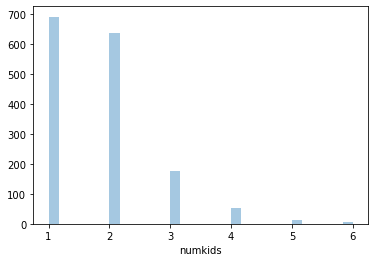

In [4]:
# Counting number of kids per family
sb.distplot(data['numkids'],hist = True, kde=False);


In [5]:
# Filtering data to find out how many families have at least one kid with behavior or health problems
data_with_bp = data[['unique_id','numkids','q601a01','q601b01','q601c01','q601d01','q601e01', 'q601f01','q601g01','q601h01','q601i01','q601j01']]

In [6]:
data_with_bp.head()

,unique_id,numkids,q601a01,q601b01,q601c01,q601d01,q601e01,q601f01,q601g01,q601h01,q601i01,q601j01
0,101,1,0,0,0,0,0,0,0,0,0,0
1,102,3,0,0,0,0,0,0,0,0,0,0
2,103,1,0,0,0,0,0,0,0,0,0,0
3,104,2,0,0,0,0,0,0,0,0,0,0
4,105,1,0,0,0,0,0,0,0,0,0,0


In [7]:
# Filtering data to find out how many families have at least one kid with behavior or health problems

data_with_bp_1 = data_with_bp.query('q601a01 > 0 or q601b01 > 0 or q601c01 > 0 or q601d01 > 0 or q601e01 > 0 or q601f01 > 0 or q601g01 > 0 or q601h01 > 0  or q601i01 > 0 or q601j01 > 0')


In [8]:
print('Out of', data.shape[0], 'families,',data_with_bp_1.shape[0], 'families had at least one kid with behavior or/and health problem')

Out of 1575 families, 526 families had at least one kid with behavior or/and health problem


In [9]:
# Modifing the data. Expanding vertically 
# Adding column with child number who has behavior or/and health problems

data = data.reindex(data.index.repeat(data.numkids))
data = data.reset_index(drop=True)
data['Child#'] = 0

n = 0
while n < data.shape[0]:
    for i in range(1, (list(data.loc[n, ['numkids']])[0]) + 1):
        data.loc[n + i - 1, ['Child#']] = i
    n += i

data.shape

(2806, 458)

In [10]:
# Adding column to flag kid who either has any problem :1 or does not :0

data['has_problem'] = 0

for col in ['q601a01','q601a02','q601a03','q601a04','q601a05','q601a06']:
    for n in range(data.shape[0]):
        data[col] = pd.to_numeric(data[col])

        if list(data.loc[n, [col]])[0] == list(data.loc[n, ['Child#']])[0]:
            data.loc[n, ['has_problem']] = 1
data.loc[data['q601a01'] == 7, 'has_problem'] = 1            

In [11]:
# Adding column type of problem   
# Filtering data for ADHD 
    
data['type'] = np.nan
data.loc[data['has_problem'] == 1, 'type'] = 'ADHD'



data.shape

(2806, 460)

In [12]:
# Filtering data for AD 

data_org = data.copy()
m = data_org.shape[0] + 1
lenght = data_org.shape[0]


for col in ['q601b01','q601b02','q601b03','q601b04','q601b05','q601b06']:
    for n in range(lenght):
        data[col] = pd.to_numeric(data[col])
        if list(data.loc[n, [col]])[0] == list(data.loc[n, ['Child#']])[0]:
            
            if list(data.loc[n, ['has_problem']])[0] == 1:
                data.loc[m] = list(data.loc[n])
                data.loc[m, ['type']] = 'AD'
                m += 1
                
            else: 
                data.loc[n, ['has_problem']] = 1
                data.loc[n, ['type']] = 'AD'
                

                
for n in range(lenght):
    if list(data.loc[n, ['q601b01']])[0] == 7:
        if list(data.loc[n, ['has_problem']])[0] == 1: 
            data.loc[m] = list(data.loc[n])
            data.loc[m, ['type']] = 'AD'
            m +=  1

            
        else: 
            data.loc[n, ['has_problem']] = 1
            data.loc[n, ['type']] = 'AD'
    


data.shape

(2852, 460)

In [13]:
# Filtering data for Aggressive 

m = data.shape[0] + 1
lenght = data_org.shape[0]

for col in ['q601c01','q601c02','q601c03','q601c04','q601c05','q601c06']:
    for n in range(lenght):
        data[col] = pd.to_numeric(data[col])

        if list(data.loc[n, [col]])[0] == list(data.loc[n, ['Child#']])[0]:
            if list(data.loc[n, ['has_problem']])[0] == 1:
                data.loc[m] = list(data.loc[n])
                data.loc[m, ['type']] = 'Aggressive'
                m += 1
                
            else: 
                data.loc[n, ['has_problem']] = 1
                data.loc[n, ['type']] = 'Aggressive'


                
for n in range(lenght):
    if list(data.loc[n, ['q601c01']])[0] == 7:
        if list(data.loc[n, ['has_problem']])[0] == 1: 
            data.loc[m] = list(data.loc[n])
            data.loc[m, ['type']] = 'Aggressive'
            m += 1
            
        else: 
            data.loc[n, ['has_problem']] = 1
            data.loc[n, ['type']] = 'Aggressive'
    

data.shape

(2898, 460)

In [14]:
# Filtering data for PDD

m = data.shape[0] + 1
lenght = data_org.shape[0]

for col in ['q601d01','q601d02','q601d03','q601d04','q601d05','q601d06']:
    for n in range(lenght):
        data[col] = pd.to_numeric(data[col])

        if list(data.loc[n, [col]])[0] == list(data.loc[n, ['Child#']])[0]:
            if list(data.loc[n, ['has_problem']])[0] == 1:
                data.loc[m] = list(data.loc[n])
                data.loc[m, ['type']] = 'PDD'
                m += 1
                
            else: 
                data.loc[n, ['has_problem']] = 1
                data.loc[n, ['type']] = 'PDD'


                
for n in range(lenght):
    if list(data.loc[n, ['q601d01']])[0] == 7:
        if list(data.loc[n, ['has_problem']])[0] == 1: 
            data.loc[m] = list(data.loc[n])
            data.loc[m, ['type']] = 'PDD'
            m += 1
            
        else: 
            data.loc[n, ['has_problem']] = 1
            data.loc[n, ['type']] = 'PDD'
    


data.shape

(2933, 460)

In [15]:
# Filtering data for AS

m = data.shape[0] + 1
lenght = data_org.shape[0]

for col in ['q601e01','q601e02','q601e03','q601e04','q601e05','q601e06']:
    for n in range(lenght):
        data[col] = pd.to_numeric(data[col])
        if list(data.loc[n, [col]])[0] == list(data.loc[n, ['Child#']])[0]: 
            if list(data.loc[n, ['has_problem']])[0] == 1:
                data.loc[m] = list(data.loc[n])
                data.loc[m, ['type']] = 'AS'
                m += 1
                
            else: 
                data.loc[n, ['has_problem']] = 1
                data.loc[n, ['type']] = 'AS'


                
for n in range(lenght):
    if list(data.loc[n, ['q601e01']])[0] == 7:
        if list(data.loc[n, ['has_problem']])[0] == 1: 
            data.loc[m] = list(data.loc[n])
            data.loc[m, ['type']] = 'AS'
            m += 1
            
        else: 
            data.loc[n, ['has_problem']] = 1
            data.loc[n, ['type']] = 'AS'



data.shape

(2967, 460)

In [16]:
# Filtering data for ASD

m = data.shape[0] + 1
lenght = data_org.shape[0]

for col in ['q601f01','q601f02','q601f03','q601f04','q601f05','q601f06']:
    for n in range(lenght):
        data[col] = pd.to_numeric(data[col])
        if list(data.loc[n, [col]])[0] == list(data.loc[n, ['Child#']])[0]:
            if list(data.loc[n, ['has_problem']])[0] == 1:
                data.loc[m] = list(data.loc[n])
                data.loc[m, ['type']] = 'ASD'
                m += 1
                
            else: 
                data.loc[n, ['has_problem']] = 1
                data.loc[n, ['type']] = 'ASD'


                
for n in range(lenght):
    if list(data.loc[n, ['q601f01']])[0] == 7:
        if list(data.loc[n, ['has_problem']])[0] == 1: 
            data.loc[m] = list(data.loc[n])
            data.loc[m, ['type']] = 'ASD'
            m += 1
            
        else: 
            data.loc[n, ['has_problem']] = 1
            data.loc[n, ['type']] = 'ASD'
    

data.shape

(3042, 460)

In [17]:
# Filtering data for other behavior problems


m = data.shape[0] + 1
lenght = data_org.shape[0]

for col in ['q601g01','q601g02','q601g03','q601g04','q601g05','q601g06']:
    for n in range(lenght):
        data[col] = pd.to_numeric(data[col])
        if list(data.loc[n, [col]])[0] == list(data.loc[n, ['Child#']])[0]:
            if list(data.loc[n, ['has_problem']])[0] == 1:
                data.loc[m] = list(data.loc[n])
                data.loc[m, ['type']] = 'Behavior'
                m += 1
                
            else: 
                data.loc[n, ['has_problem']] = 1
                data.loc[n, ['type']] = 'Behavior'


                
for n in range(lenght):
    if list(data.loc[n, ['q601g01']])[0] == 7:
        if list(data.loc[n, ['has_problem']])[0] == 1: 
            data.loc[m] = list(data.loc[n])
            data.loc[m, ['type']] = 'Behavior'
            m += 1
            
        else: 
            data.loc[n, ['has_problem']] = 1
            data.loc[n, ['type']] = 'Behavior'
    

data.shape

(3144, 460)

In [18]:
# Filtering data for Asthma

m = data.shape[0] + 1
lenght = data_org.shape[0]

for col in ['q601h01','q601h02','q601h03','q601h04','q601h05','q601h06']:
    for n in range(lenght):
        data[col] = pd.to_numeric(data[col])
        if list(data.loc[n, [col]])[0] == list(data.loc[n, ['Child#']])[0]:
            if list(data.loc[n, ['has_problem']])[0] == 1:
                data.loc[m] = list(data.loc[n])
                data.loc[m, ['type']] = 'Asthma'
                m += 1
                
            else: 
                data.loc[n, ['has_problem']] = 1
                data.loc[n, ['type']] = 'Asthma'


                
for n in range(lenght):
    if list(data.loc[n, ['q601h01']])[0] == 7:
        if list(data.loc[n, ['has_problem']])[0] == 1: 
            data.loc[m] = list(data.loc[n])
            data.loc[m, ['type']] = 'Asthma'
            m += 1
            
        else: 
            data.loc[n, ['has_problem']] = 1
            data.loc[n, ['type']] = 'Asthma'
    
data.shape

(3212, 460)

In [19]:
# Filtering data for Heart

m = data.shape[0] + 1
lenght = data_org.shape[0]

for col in ['q601i01','q601i02','q601i03','q601i04','q601i05','q601i06']:
    for n in range(lenght):
        data[col] = pd.to_numeric(data[col])
        if list(data.loc[n, [col]])[0] == list(data.loc[n, ['Child#']])[0]:
            if list(data.loc[n, ['has_problem']])[0] == 1:
                data.loc[m] = list(data.loc[n])
                data.loc[m, ['type']] = 'Heart'
                m += 1
                
            else: 
                data.loc[n, ['has_problem']] = 1
                data.loc[n, ['type']] = 'Heart'


                
for n in range(lenght):
    if list(data.loc[n, ['q601i01']])[0] == 7:
        if list(data.loc[n, ['has_problem']])[0] == 1: 
            data.loc[m] = list(data.loc[n])
            data.loc[m, ['type']] = 'Heart'
            m += 1
            
        else: 
            data.loc[n, ['has_problem']] = 1
            data.loc[n, ['type']] = 'Heart'
    

data.shape

(3227, 460)

In [20]:
# Filtering data for Chronic condition


m = data.shape[0] + 1
lenght = data_org.shape[0]


for col in ['q601j01','q601j02','q601j03','q601j04','q601j05','q601j06']:
    for n in range(lenght):
        data[col] = pd.to_numeric(data[col])
        if list(data.loc[n, [col]])[0] == list(data.loc[n, ['Child#']])[0]:
            if list(data.loc[n, ['has_problem']])[0] == 1:
                data.loc[m] = list(data.loc[n])
                data.loc[m, ['type']] = 'Chronic condition'
                m += 1
                
            else: 
                data.loc[n, ['has_problem']] = 1
                data.loc[n, ['type']] = 'Chronic condition'


                
for n in range(lenght):
    if list(data.loc[n, ['q601j01']])[0] == 7:
        if list(data.loc[n, ['has_problem']])[0] == 1: 
            data.loc[m] = list(data.loc[n])
            data.loc[m, ['type']] = 'Chronic condition'
            m += 1
            
        else: 
            data.loc[n, ['has_problem']] = 1
            data.loc[n, ['type']] = 'Chronic condition'
    

data.shape

(3315, 460)

In [21]:
# Filtering data for Special needs

m = data.shape[0] + 1
lenght = data_org.shape[0]

for col in ['q60201','q60202','q60203','q60204','q60205','q60206']:
    for n in range(lenght):
        data[col] = pd.to_numeric(data[col])
        if list(data.loc[n, [col]])[0] == list(data.loc[n, ['Child#']])[0]:
            if list(data.loc[n, ['has_problem']])[0] == 1:
                data.loc[m] = list(data.loc[n])
                data.loc[m, ['type']] = 'Special needs'
                m += 1
                
            else: 
                data.loc[n, ['has_problem']] = 1
                data.loc[n, ['type']] = 'Special needs'


                
for n in range(lenght):
    if list(data.loc[n, ['q60201']])[0] == 7:
        if list(data.loc[n, ['has_problem']])[0] == 1: 
            data.loc[m] = list(data.loc[n])
            data.loc[m, ['type']] = 'Special needs'
            m += 1
            
        else: 
            data.loc[n, ['has_problem']] = 1
            data.loc[n, ['type']] = 'Special needs'
    

data.shape

(3483, 460)

In [22]:
# Filtering data for Attention problem

m = data.shape[0] + 1
lenght = data_org.shape[0]
for col in ['q60301','q60302','q60303','q60304','q60305','q60306']:
    for n in range(lenght):
        data[col] = pd.to_numeric(data[col])
        if list(data.loc[n, [col]])[0] == list(data.loc[n, ['Child#']])[0]:
            if list(data.loc[n, ['has_problem']])[0] == 1:
                data.loc[m] = list(data.loc[n])
                data.loc[m, ['type']] = 'Attention problem'
                m += 1
                
            else: 
                data.loc[n, ['has_problem']] = 1
                data.loc[n, ['type']] = 'Attention problem'


                
for n in range(lenght):
    if list(data.loc[n, ['q60301']])[0] == 7:
        if list(data.loc[n, ['has_problem']])[0] == 1: 
            data.loc[m] = list(data.loc[n])
            data.loc[m, ['type']] = 'Attention problem'
            m += 1
            
        else: 
            data.loc[n, ['has_problem']] = 1
            data.loc[n, ['type']] = 'Attention problem'
    
data.shape

(3523, 460)

In [23]:
# Filtering data for More medical needs

m = data.shape[0] + 1
lenght = data_org.shape[0]
for col in ['q60401','q60402','q60403','q60404','q60405','q60406']:
    for n in range(lenght):
        data[col] = pd.to_numeric(data[col])
        if list(data.loc[n, [col]])[0] == list(data.loc[n, ['Child#']])[0]:
            if list(data.loc[n, ['has_problem']])[0] == 1:
                data.loc[m] = list(data.loc[n])
                data.loc[m, ['type']] = 'More medical'
                m += 1
                
            else: 
                data.loc[n, ['has_problem']] = 1
                data.loc[n, ['type']] = 'More medical'


                
for n in range(lenght):
    if list(data.loc[n, ['q60401']])[0] == 7:
        if list(data.loc[n, ['has_problem']])[0] == 1: 
            data.loc[m] = list(data.loc[n])
            data.loc[m, ['type']] = 'More medical'
            m += 1
            
        else: 
            data.loc[n, ['has_problem']] = 1
            data.loc[n, ['type']] = 'More medical'
    

data.shape

(3776, 460)

In [24]:
# Filtering data for Limited ability


m = data.shape[0] + 1
lenght = data_org.shape[0]
for col in ['q60501','q60502','q60503','q60504','q60505','q60506']:
    for n in range(lenght):
        data[col] = pd.to_numeric(data[col])
        if list(data.loc[n, [col]])[0] == list(data.loc[n, ['Child#']])[0]:
            if list(data.loc[n, ['has_problem']])[0] == 1:
                data.loc[m] = list(data.loc[n])
                data.loc[m, ['type']] = 'Limited ability'
                m += 1
                
            else: 
                data.loc[n, ['has_problem']] = 1
                data.loc[n, ['type']] = 'Limited ability'


                
for n in range(lenght):
    if list(data.loc[n, ['q60501']])[0] == 7:
        if list(data.loc[n, ['has_problem']])[0] == 1: 
            data.loc[m] = list(data.loc[n])
            data.loc[m, ['type']] = 'Limited ability'
            m += 1
            
        else: 
            data.loc[n, ['has_problem']] = 1
            data.loc[n, ['type']] = 'Limited ability'
    

data.shape

(3921, 460)

In [25]:
# Filtering data for PT/OT (aka: special therapy, speech, physical therapy, occupational therapy and/or psychological services)


m = data.shape[0] + 1
lenght = data_org.shape[0]
for col in ['q60601','q60602','q60603','q60604','q60605','q60606']:
    for n in range(lenght):
        data[col] = pd.to_numeric(data[col])
        if list(data.loc[n, [col]])[0] == list(data.loc[n, ['Child#']])[0]:
            if list(data.loc[n, ['has_problem']])[0] == 1:
                data.loc[m] = list(data.loc[n])
                data.loc[m, ['type']] = 'PT/OT'
                m += 1
                
            else: 
                data.loc[n, ['has_problem']] = 1
                data.loc[n, ['type']] = 'PT/OT'


                
for n in range(lenght):
    if list(data.loc[n, ['q60601']])[0] == 7:
        if list(data.loc[n, ['has_problem']])[0] == 1: 
            data.loc[m] = list(data.loc[n])
            data.loc[m, ['type']] = 'PT/OT'
            m += 1
            
        else: 
            data.loc[n, ['has_problem']] = 1
            data.loc[n, ['type']] = 'PT/OT'
    

data.shape

(4191, 460)

In [26]:
# Filtering data for IEP

m = data.shape[0] + 1
lenght = data_org.shape[0]

for col in ['q60701','q60702','q60703','q60704','q60705','q60706']:
    for n in range(lenght):
        data[col] = pd.to_numeric(data[col])
        if list(data.loc[n, [col]])[0] == list(data.loc[n, ['Child#']])[0]:
            if list(data.loc[n, ['has_problem']])[0] == 1:
                data.loc[m] = list(data.loc[n])
                data.loc[m, ['type']] = 'IEP'
                m += 1
                
            else: 
                data.loc[n, ['has_problem']] = 1
                data.loc[n, ['type']] = 'IEP'


                
for n in range(lenght):
    if list(data.loc[n, ['q60701']])[0] == 7:
        if list(data.loc[n, ['has_problem']])[0] == 1: 
            data.loc[m] = list(data.loc[n])
            data.loc[m, ['type']] = 'IEP'
            m += 1
            
        else: 
            data.loc[n, ['has_problem']] = 1
            data.loc[n, ['type']] = 'IEP'
    


data.shape

(4358, 460)

In [27]:
# Filtering data for IFSP


m = data.shape[0] + 1
lenght = data_org.shape[0]

for col in ['q60801','q60802','q60803','q60804','q60805','q60806']:
    for n in range(lenght):
        data[col] = pd.to_numeric(data[col])
        if list(data.loc[n, [col]])[0] == list(data.loc[n, ['Child#']])[0]:
            if list(data.loc[n, ['has_problem']])[0] == 1:
                data.loc[m] = list(data.loc[n])
                data.loc[m, ['type']] = 'IFSP'
                m += 1
                
            else: 
                data.loc[n, ['has_problem']] = 1
                data.loc[n, ['type']] = 'IFSP'


                
for n in range(lenght):
    if list(data.loc[n, ['q60801']])[0] == 7:
        if list(data.loc[n, ['has_problem']])[0] == 1: 
            data.loc[m] = list(data.loc[n])
            data.loc[m, ['type']] = 'IFSP'
            m += 1
            
        else: 
            data.loc[n, ['has_problem']] = 1
            data.loc[n, ['type']] = 'IFSP'
    

data.shape

(4366, 460)

In [28]:
# Cleaning the data from the columns what have been filtered above

data.drop(['q601a01','q601a02','q601a03','q601a04','q601a05','q601a06'], axis=1, inplace=True)
data.drop(['q601b01','q601b02','q601b03','q601b04','q601b05','q601b06'], axis=1, inplace=True)
data.drop(['q601c01','q601c02','q601c03','q601c04','q601c05','q601c06'], axis=1, inplace=True)
data.drop(['q601d01','q601d02','q601d03','q601d04','q601d05','q601d06'], axis=1, inplace=True)
data.drop(['q601e01','q601e02','q601e03','q601e04','q601e05','q601e06'], axis=1, inplace=True)
data.drop(['q601f01','q601f02','q601f03','q601f04','q601f05','q601f06'], axis=1, inplace=True)
data.drop(['q601g01','q601g02','q601g03','q601g04','q601g05','q601g06'], axis=1, inplace=True)
data.drop(['q601h01','q601h02','q601h03','q601h04','q601h05','q601h06'], axis=1, inplace=True)
data.drop(['q601i01','q601i02','q601i03','q601i04','q601i05','q601i06'], axis=1, inplace=True)
data.drop(['q601j01','q601j02','q601j03','q601j04','q601j05','q601j06'], axis=1, inplace=True)
data.drop(['q60201','q60202','q60203','q60204','q60205','q60206'], axis=1, inplace=True)

data.drop(['q60801','q60802','q60803','q60804','q60805','q60806'], axis=1, inplace=True)

data.drop(['q60701','q60702','q60703','q60704','q60705','q60706'], axis=1, inplace=True)

data.drop(['q60601','q60602','q60603','q60604','q60605','q60606'], axis=1, inplace=True)

data.drop(['q60501','q60502','q60503','q60504','q60505','q60506'], axis=1, inplace=True)

data.drop(['q60401','q60402','q60403','q60404','q60405','q60406'], axis=1, inplace=True)

data.drop(['q60301','q60302','q60303','q60304','q60305','q60306'], axis=1, inplace=True)


data.shape



(4366, 358)

In [29]:
# Dropping the columns that are going to be unused
list_drop = ['year','month','day','sam_type','q100', 'q100xlld','agecnt1','agecnt2','agecnt3','agecnt4',
                'q101a2a', 'q101b2a','q101c2a','q101d2a', 'q101e2a','q101f2a','q104', 'q609','q800a','q800aage','q800b','q801','p4','q905'] + list(data.loc[:, 'WEIGHT_GEN_POP':'WEIGHT_AUT_ALL'].columns)+list(data.loc[:, 'q802a':'q806o'].columns)+ list(data.loc[:, 'q906':'q907f'].columns)

df = data.drop(list_drop, axis=1)


In [30]:
# Renaming the data in the location column for better understading


df.loc[df['strata'] == '11','strata'] = 'NE low'
df.loc[df['strata'] == '12','strata'] = 'NE high'
df.loc[df['strata'] == '21','strata'] = 'MW low'
df.loc[df['strata'] == '22','strata'] = 'MW high'
df.loc[df['strata'] == '31','strata'] = 'S low'
df.loc[df['strata'] == '32','strata'] = 'S high'
df.loc[df['strata'] == '41','strata'] = 'W low'
df.loc[df['strata'] == '42','strata'] = 'W high'
df.loc[df['strata'] == '50','strata'] = 'Autistic child'







In [31]:
# Expanding the data vertically 
# Adding child_age, gender and hours per week spend in childcare

df = df.reset_index(drop=True)

df['child_age'] = 0
df['sex'] = np.nan
df['hrs/wk in chld care'] = 0

length = df.shape[0]
child = 1

for col in ['q101a1','q101b1','q101c1','q101d1','q101e1','q101f1']:
    for n in range(length):
        df[col] = pd.to_numeric(df[col])
        if list(df.loc[n, ['Child#']])[0] == child:
            df.loc[n, ['child_age']] = list(df.loc[n, [col]])[0]
            
    child += 1
            
child = 1
for col in ['q101a2','q101b2','q101c2','q101d2','q101e2','q101f2']:
    for n in range(length):
        df[col] = pd.to_numeric(df[col])
        if list(df.loc[n, ['Child#']])[0] == child:
            df.loc[n, ['sex']] = list(df.loc[n, [col]])[0]
            
    child += 1    
    
    
df.loc[df['sex'] == 1,'sex'] = 'male'
df.loc[df['sex'] == 2,'sex'] = 'female'   
df.loc[df['sex'] == 3,'sex'] = np.nan   



child = 1

for col in ['q303a','q303b','q303c','q303d','q303e','q303f']:
    for n in range(length):
        df[col] = pd.to_numeric(df[col])
        if list(df.loc[n, ['Child#']])[0] == child:
            df.loc[n, ['hrs/wk in chld care']] = list(df.loc[n, [col]])[0]
            
    child += 1

In [32]:
# Cleaning the data from the columns what have been filtered above

df.drop(['q303a','q303b','q303c','q303d','q303e','q303f','q101a1','q101b1','q101c1','q101d1','q101e1','q101f1','q101a2','q101b2','q101c2','q101d2','q101e2','q101f2'], axis=1, inplace=True)


In [33]:
# Renaming columns and rows for better understanding

df.rename(columns={"q105": "two_parent_house", "q200": "regular_activity"}, inplace=True)

df.loc[df['two_parent_house'] == 1,'two_parent_house'] = 'yes'
df.loc[df['two_parent_house'] == 2,'two_parent_house'] = 'no' 

df.loc[df['regular_activity'] == 1,'regular_activity'] = 'yes'
df.loc[df['regular_activity'] == 2,'regular_activity'] = 'no' 

In [34]:
df = df.reset_index(drop=True)


In [35]:
df.drop(['s1','s3'], axis=1, inplace=True)



In [36]:
# Expanding the data vertically 
# Adding column Race
# Renaming columns for better undestanding

df['RACE'] = np.nan


df.rename(columns={"DEMO_ETHNICITY": "Hispanic", "DEMO_RACE_WHITE": "White", "DEMO_RACE_BLACK": "Black",
                  "DEMO_RACE_ASIAN": "Asian", "DEMO_RACE_AMERICAN_INDIAN": "Native_American",
                  "DEMO_RACE_NATIVE_HAWAIIAN": "Native_Hawaiian", "DEMO_RACE_OTHER": "Other"}, inplace=True)

df.loc[df['Hispanic'] == '1','Hispanic'] = 'yes'
df.loc[df['Hispanic'] == '2','Hispanic'] = np.nan
df.loc[df['Hispanic'] == '3','Hispanic'] = np.nan

df.loc[df['White'] == '1','White'] = 'yes'
df.loc[df['White'] == '2','White'] = np.nan
df.loc[df['White'] == '9','White'] = np.nan

df.loc[df['Black'] == '1','Black'] = 'yes'
df.loc[df['Black'] == '2','Black'] = np.nan

df.loc[df['Asian'] == '1','Asian'] = 'yes'
df.loc[df['Asian'] == '2','Asian'] = np.nan

df.loc[df['Native_American'] == '1','Native_American'] = 'yes'
df.loc[df['Native_American'] == '2','Native_American'] = np.nan

df.loc[df['Native_Hawaiian'] == '1','Native_Hawaiian'] = 'yes'
df.loc[df['Native_Hawaiian'] == '2','Native_Hawaiian'] = np.nan

df.loc[df['Other'] == '1','Other'] = 'yes'
df.loc[df['Other'] == '2','Other'] = np.nan

In [37]:
df.loc[df['Hispanic'] == 'yes','RACE'] = 'Hispanic'


df.loc[df['White'] == 'yes','RACE'] = 'White'


df.loc[df['Black'] == 'yes','RACE'] = 'Black'

df.loc[df['Asian'] == 'yes','RACE'] = 'Asian'

df.loc[df['Native_American'] == 'yes','RACE'] = 'Native_American'

df.loc[df['Native_Hawaiian'] == 'yes','RACE'] = 'Native_Hawaiian'

df.loc[df['Other'] == 'yes','RACE'] = 'Other'


In [38]:
# Adding column for counting number of races per family

df_race = df[["Hispanic", "White", "Black", "Asian", "Native_American", "Native_Hawaiian", "Other"]]

df['num_races'] = df_race.count(axis = 1)

df.loc[df['num_races'] == 2,'RACE'] = 'Mix'

                            
df.sort_values(by=['unique_id'])
df = df.reset_index(drop=True)            
            
            

In [39]:
# Adding column for tracking if any parent is currently unemployed


df['Unemployment'] = 0

for col in ['q702_a01','q702_a02','q702_a03','q702_a04','q702_a05','q702_a06']:
    for n in range(df.shape[0]):
        df[col] = pd.to_numeric(df[col])

        if list(df.loc[n, [col]])[0] == list(df.loc[n, ['Child#']])[0]:
            df.loc[n, ['Unemployment']] = 1
            
df.loc[df['q702_a01'] == 7, 'Unemployment'] = 1      

df.drop(['q702_a01','q702_a02','q702_a03','q702_a04','q702_a05','q702_a06'], axis = 1, inplace=True)


In [40]:
# Remaning column to out-of-pocket child care per family expences 

df.rename(columns={"q310": "OOP_child_care"}, inplace=True)
         
        
        
df.loc[df['OOP_child_care'] == 98, 'OOP_child_care'] = np.nan
df.loc[df['OOP_child_care'] == 99, 'OOP_child_care'] = np.nan
df.loc[df['OOP_child_care'] == '.', 'OOP_child_care'] = np.nan

In [41]:
# Saving the filtered data for further analysis
df.sort_values(by=['unique_id'])
df = df.reset_index(drop=True)
df.to_csv('data.csv')